In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive"
PATH_OF_DATA= '/content/gdrive/"My Drive"/Tumor'
!ls {PATH_OF_DATA}
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
import os
import shutil
from torchvision import transforms

# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.Resize(size=128),
        transforms.RandomRotation(degrees=15),
        
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=128),  # Image net standards
        transforms.ToTensor()
        
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=128),
        transforms.CenterCrop(size=128),
        transforms.ToTensor()
        
    ]),
}
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
data_transforms = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
# Datasets from folders
data = {
    'train':
    datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/training_set', transform=image_transforms['train']),
    'valid':
    datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/validation_set', transform=image_transforms['valid'])
}

test_data = datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/test_set', transform=data_transforms)
num_train = len(data['train'])
valid_size = 0.2
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=32,sampler=train_sampler, num_workers=0),
    'val': DataLoader(data['valid'], batch_size=32,sampler=train_sampler, num_workers=0)

}
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, 
    num_workers=0)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
test_set  training_set	tumor1.pt  tumor.pt  validation_set


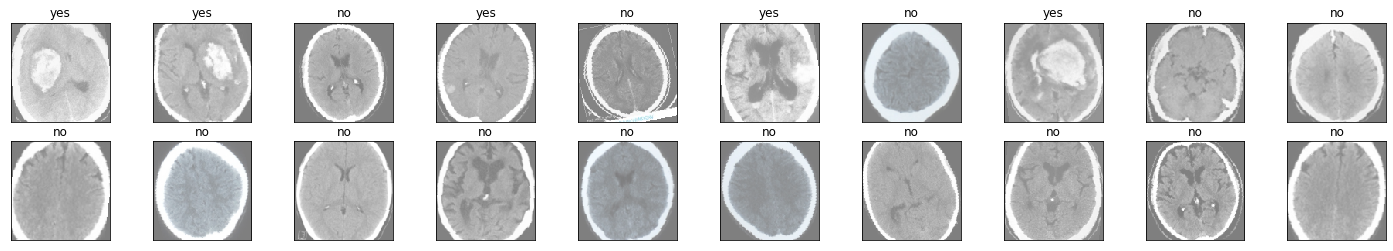

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
classes = ['no','yes']
dataiter = iter(dataloaders['train'])
images, labels = dataiter.next()
labels.shape
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [0]:
#import models from torchvision
from torchvision import models
#build the pretrained model (vgg16 in this case)
model = models.vgg16(pretrained = True)
#import OrderedDicted to corectly align the network layers
#import nn you use activation and dropout features
from collections import OrderedDict
from torch import nn
#create classifier
classifier =nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 512)),
                           ('relu', nn.ReLU()), 
                           ('fc2', nn.Linear(512, 2)),
                           ('output', nn.LogSoftmax(dim=1))
                             ]))
#replace the model's classifier with this new classifier 
#transfer learning connection applied here
model.classifier = classifier

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:22<00:00, 24.6MB/s]


In [0]:
model.classifier


Sequential(
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (output): LogSoftmax()
)

In [0]:
#import optimizer for 
from torch import optim
#define criteria and optimizer
criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
len(dataloaders['train'].dataset)

140

In [0]:
#define training function
def train (model, loader, criterion):
    model.train()
    current_loss = 0
    current_correct = 0
    for train, y_train in iter(dataloaders['train']):
        
        optimizer.zero_grad()
        output = model.forward(train)
        _, preds = torch.max(output,1)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()*train.size(0)
        current_correct += torch.sum(preds == y_train.data)
    epoch_loss = current_loss / len( dataloaders['train'].dataset)
    epoch_acc = current_correct.double() / len(dataloaders['train'].dataset)
        
    return epoch_loss, epoch_acc

In [0]:
for param in model.parameters():
    param.require_grad = False
#train and validate
epochs = 10  
epoch = 0
#send model to GPU

    
for e in range(epochs):
    epoch +=1
    print(epoch)
    with torch.set_grad_enabled(True):
        epoch_train_loss, epoch_train_acc = train(model,dataloaders['train'], criteria)
    print("Epoch: {} Train Loss : {:.4f}  Train Accuracy: {:.4f}".format(epoch,epoch_train_loss,epoch_train_acc))

1
Epoch: 1 Train Loss : 0.4984  Train Accuracy: 0.4714
2
Epoch: 2 Train Loss : 0.6634  Train Accuracy: 0.4286
3
Epoch: 3 Train Loss : 0.4564  Train Accuracy: 0.6214
4
Epoch: 4 Train Loss : 0.3553  Train Accuracy: 0.6571
5
Epoch: 5 Train Loss : 0.6233  Train Accuracy: 0.5357
6
Epoch: 6 Train Loss : 0.3575  Train Accuracy: 0.6643
7
Epoch: 7 Train Loss : 0.4442  Train Accuracy: 0.5357
8
Epoch: 8 Train Loss : 0.2411  Train Accuracy: 0.7500
9
Epoch: 9 Train Loss : 0.2784  Train Accuracy: 0.7143
10
Epoch: 10 Train Loss : 0.6176  Train Accuracy: 0.5786


In [0]:

# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
batch_size = 20

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available

    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criteria(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.439375

Test Accuracy of    no: 100% (10/10)
Test Accuracy of   yes: 80% ( 8/10)

Test Accuracy (Overall): 90% (18/20)


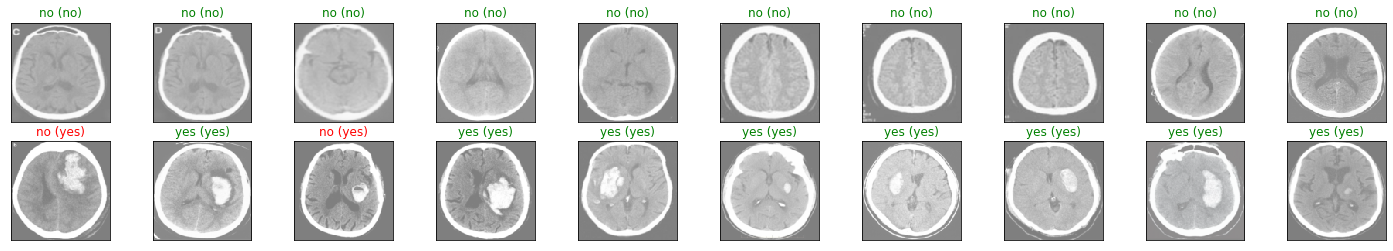

In [0]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available


# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) 

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))